In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [4]:
data = pd.read_csv('ValoresAtipicosMilan.csv', index_col="id")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23705 entries, 6400 to 1247058921429251974
Data columns (total 49 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  23705 non-null  object 
 1   name                                          23705 non-null  object 
 2   host_id                                       23705 non-null  int64  
 3   host_name                                     23705 non-null  object 
 4   host_since                                    23705 non-null  object 
 5   host_response_time                            23705 non-null  object 
 6   host_is_superhost                             23705 non-null  object 
 7   host_identity_verified                        23705 non-null  object 
 8   neighbourhood                                 23705 non-null  object 
 9   neighbourhood_cleansed                        237

In [6]:
data.head()

,last_scraped,name,host_id,host_name,host_since,host_response_time,host_is_superhost,host_identity_verified,neighbourhood,neighbourhood_cleansed,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
id,,,,,,,,,,,,,,,,,,,,,
6400,2024-09-17,The Studio Milan,13822,Francesca,2009-04-17,Unknown,f,f,"Milan, Lombardy, Italy",TIBALDI,...,5.00,5.00,5.00,5.00,4.56,4.67,1.0,0.0,1.0,0.0
23986,2024-09-17,""" Characteristic Milanese flat""",95941,Jeremy,2010-03-19,within an hour,f,t,Milan,NAVIGLI,...,4.67,4.22,4.59,4.74,4.70,4.48,1.0,1.0,0.0,0.0
40470,2024-09-17,Giacinto Cosy & clean flat near MM1,174203,Giacinto,2010-07-20,within an hour,f,t,Milan,VIALE MONZA,...,4.71,4.83,4.98,4.88,4.44,4.51,2.0,2.0,0.0,0.0
46536,2024-09-17,Nico & Cinzia's Pink Suite!,138683,Nico&Cinzia,2010-06-05,Unknown,f,t,"Milan, Lombardy, Italy",VIALE MONZA,...,4.61,4.64,4.83,4.92,4.33,4.58,1.0,1.0,0.0,0.0
59226,2024-09-18,Near Piazza Gae Aulenti silent e reserved flat,244087,Francesca,2010-09-24,Unknown,f,t,"Milan, Lombardy, Italy",CENTRALE,...,4.33,3.89,4.89,4.89,4.44,4.44,1.0,1.0,0.0,0.0


In [7]:
freq_tbl(data)

  last_scraped  frequency  percentage  cumulative_perc
0   2024-09-17      21359    0.901034         0.901034
1   2024-09-18       2346    0.098966         1.000000

----------------------------------------------------------------

                                                    name  frequency  \
0                                    Appartamento Milano         10   
1       Prestige Boutique Aparthotel - Piazza Duomo View          9   
2                          Appartamento vicino al centro          7   
3                                Cozy Apartment in Milan          6   
4                        Appartamento incantevole Milano          6   
...                                                  ...        ...   
23244      Co99 Art Building - Comfort Room ( disabili )          1   
23245             @Corso Garibaldi con vista sulla città          1   
23246                            PrimoPiano - Pavia Flat          1   
23247    Incantevole stanza monolocale con bagno privato  

**host_response_time**

In [8]:
#Obtengo un analisis univariado de una variable categorica en especifico
table1 = freq_tbl(data['host_response_time'])
table1

,host_response_time,frequency,percentage,cumulative_perc
0,within an hour,15488,0.653364,0.653364
1,Unknown,3854,0.162582,0.815946
2,within a few hours,2214,0.093398,0.909344
3,within a day,1418,0.059819,0.969163
4,a few days or more,731,0.030837,1.000000


In [9]:
#Debemos quedarnos solo con la información significativa 
#Elimino las columnas "percentage" y "cumulative_perc" para trabajar con las frecuencias
table2 = table1.drop(['percentage', 'cumulative_perc'], axis = 1)
table2

,host_response_time,frequency
0,within an hour,15488
1,Unknown,3854
2,within a few hours,2214
3,within a day,1418
4,a few days or more,731


In [10]:
#Ajusto el indice de mi dataframe 
Filtro_index = table2.set_index('host_response_time')
Filtro_index

,frequency
host_response_time,
within an hour,15488
Unknown,3854
within a few hours,2214
within a day,1418
a few days or more,731


<Axes: ylabel='frequency'>

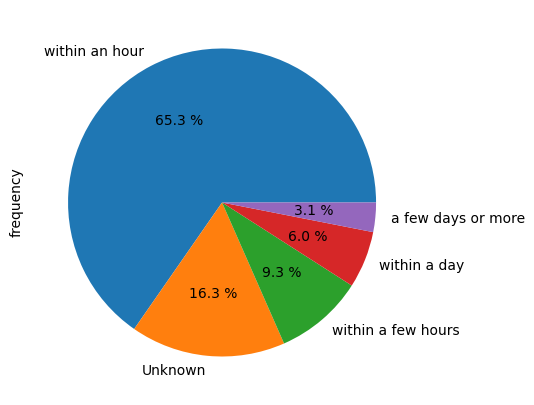

In [11]:
Filtro_index['frequency'].plot(kind='pie', figsize=(10,5), shadow=False, autopct='%0.1f %%')

**host_is_superhost**

In [12]:
table1 = freq_tbl(data['host_is_superhost'])
table1

,host_is_superhost,frequency,percentage,cumulative_perc
0,f,17131,0.722675,0.722675
1,t,6574,0.277325,1.000000


In [13]:
#Debemos quedarnos solo con la información significativa 
#Elimino las columnas "percentage" y "cumulative_perc" para trabajar con las frecuencias
table2 = table1.drop(['percentage', 'cumulative_perc'], axis = 1)
table2

,host_is_superhost,frequency
0,f,17131
1,t,6574


In [14]:
#Ajusto el indice de mi dataframe 
Filtro_index = table2.set_index('host_is_superhost')
Filtro_index

,frequency
host_is_superhost,
f,17131
t,6574


Text(0, 0.5, 'Frecuencia')

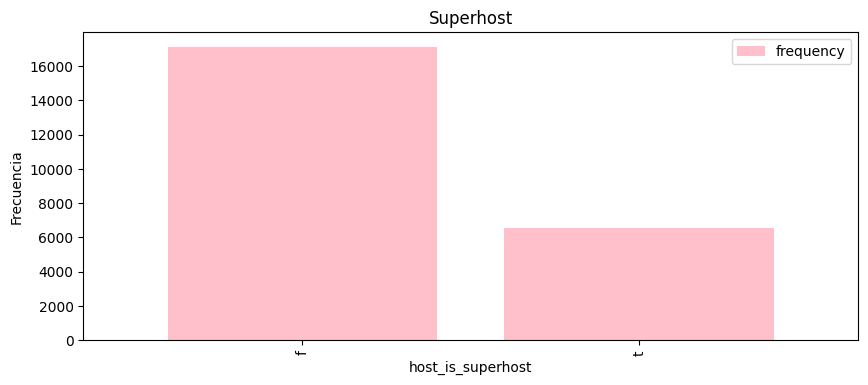

In [15]:
#Realizamos grafica de barras del dataframe filtrado
Filtro_index.plot(kind='bar', width=0.8, figsize=(10,4), color='pink')
plt.title('Superhost')
plt.ylabel('Frecuencia')

**host_identity_verified**

In [16]:
table1 = freq_tbl(data['host_identity_verified'])
table1

,host_identity_verified,frequency,percentage,cumulative_perc
0,t,22316,0.941405,0.941405
1,f,1389,0.058595,1.000000


In [17]:
#Debemos quedarnos solo con la información significativa 
#Elimino las columnas "percentage" y "cumulative_perc" para trabajar con las frecuencias
table2 = table1.drop(['percentage', 'cumulative_perc'], axis = 1)
table2

,host_identity_verified,frequency
0,t,22316
1,f,1389


In [18]:
#Ajusto el indice de mi dataframe 
Filtro_index = table2.set_index('host_identity_verified')
Filtro_index

,frequency
host_identity_verified,
t,22316
f,1389


Text(0, 0.5, 'Frecuencia')

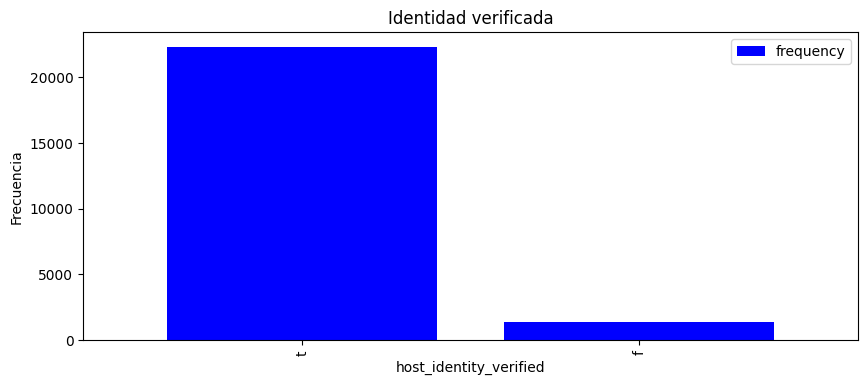

In [19]:
#Realizamos grafica de barras del dataframe filtrado
Filtro_index.plot(kind='bar', width=0.8, figsize=(10,4), color='blue')
plt.title('Identidad verificada')
plt.ylabel('Frecuencia')

**property_type**

In [20]:
table1 = freq_tbl(data['property_type'])
table1

,property_type,frequency,percentage,cumulative_perc
0,Entire rental unit,14131,0.596119,0.596119
1,Entire condo,4788,0.201983,0.798102
2,Private room in rental unit,1679,0.070829,0.868931
3,Private room in condo,727,0.030669,0.899599
4,Entire loft,586,0.024721,0.924320
5,Entire home,405,0.017085,0.941405
6,Entire serviced apartment,253,0.010673,0.952078
7,Entire vacation home,192,0.008100,0.960177
8,Private room in bed and breakfast,172,0.007256,0.967433
9,Private room in home,124,0.005231,0.972664


In [21]:
#Elimino las columnas "percentage" y "cumulative_perc" para trabajar con las frecuencias
table2 = table1.drop(['percentage', 'cumulative_perc'], axis = 1)
table2

,property_type,frequency
0,Entire rental unit,14131
1,Entire condo,4788
2,Private room in rental unit,1679
3,Private room in condo,727
4,Entire loft,586
5,Entire home,405
6,Entire serviced apartment,253
7,Entire vacation home,192
8,Private room in bed and breakfast,172
9,Private room in home,124


In [22]:
#Obtengo un filtro de los valores mas reelevantes de la variable categorica seleccionada 
Filtro = table2[table2['frequency'] > 20]
Filtro

,property_type,frequency
0,Entire rental unit,14131
1,Entire condo,4788
2,Private room in rental unit,1679
3,Private room in condo,727
4,Entire loft,586
5,Entire home,405
6,Entire serviced apartment,253
7,Entire vacation home,192
8,Private room in bed and breakfast,172
9,Private room in home,124


In [23]:
#Ajusto el indice de mi dataframe 
Filtro_index = Filtro.set_index('property_type')
Filtro_index

,frequency
property_type,
Entire rental unit,14131
Entire condo,4788
Private room in rental unit,1679
Private room in condo,727
Entire loft,586
Entire home,405
Entire serviced apartment,253
Entire vacation home,192
Private room in bed and breakfast,172


Text(0, 0.5, 'Frecuencia')

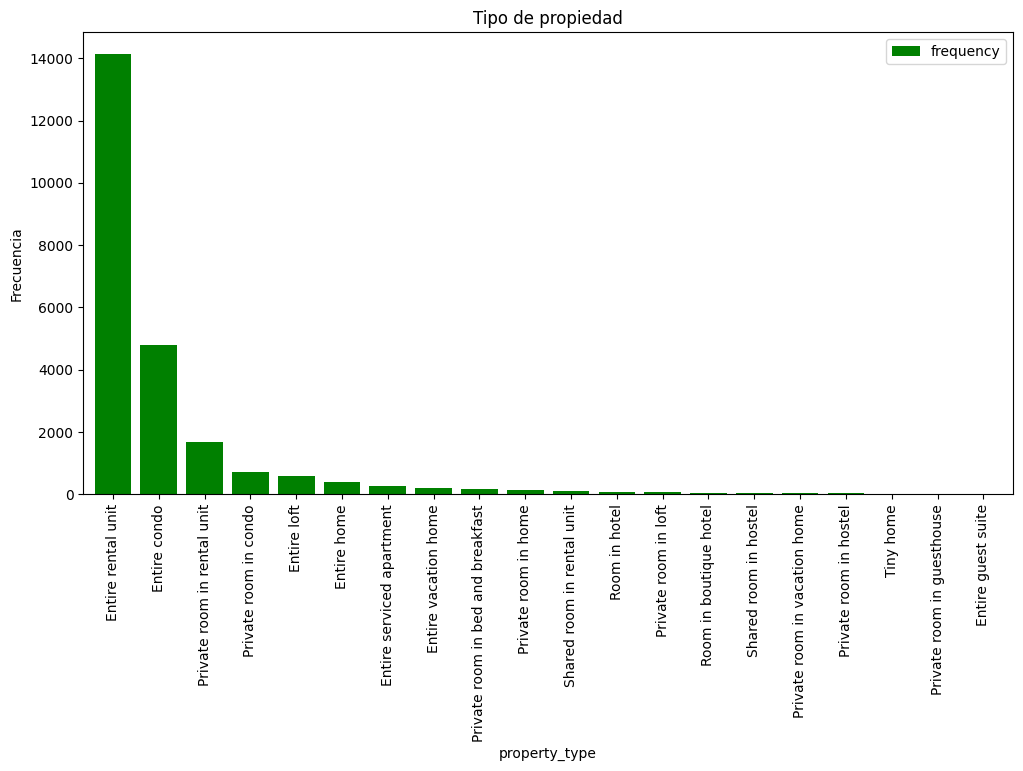

In [24]:
#Realizamos grafica de barras del dataframe filtrado
Filtro_index.plot(kind='bar', width=0.8, figsize=(12,6), color='green')
plt.title('Tipo de propiedad')
plt.ylabel('Frecuencia')

**room_type**

In [25]:
table1 = freq_tbl(data['room_type'])
table1

,room_type,frequency,percentage,cumulative_perc
0,Entire home/apt,20469,0.863489,0.863489
1,Private room,3040,0.128243,0.991732
2,Shared room,177,0.007467,0.999198
3,Hotel room,19,0.000802,1.000000


In [26]:
#Elimino las columnas "percentage" y "cumulative_perc" para trabajar con las frecuencias
table2 = table1.drop(['percentage', 'cumulative_perc'], axis = 1)
table2

,room_type,frequency
0,Entire home/apt,20469
1,Private room,3040
2,Shared room,177
3,Hotel room,19


In [27]:
#Ajusto el indice de mi dataframe 
Filtro_index = table2.set_index('room_type')
Filtro_index

,frequency
room_type,
Entire home/apt,20469
Private room,3040
Shared room,177
Hotel room,19


Text(0, 0.5, 'Frecuencia')

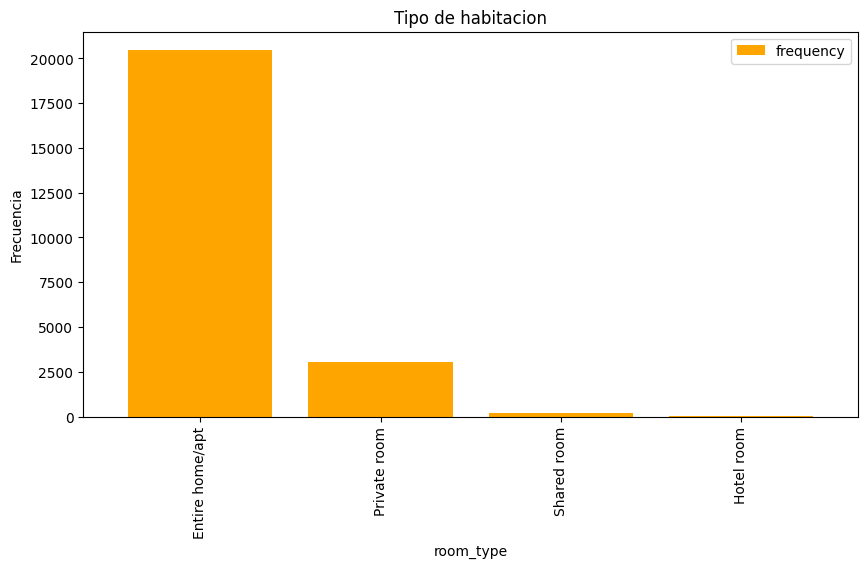

In [28]:
Filtro_index.plot(kind='bar', width=0.8, figsize=(10,5), color='orange')
plt.title('Tipo de habitacion')
plt.ylabel('Frecuencia')

**has_availability**

In [29]:
table1 = freq_tbl(data['has_availability'])
table1

,has_availability,frequency,percentage,cumulative_perc
0,t,23705,1.0,1.0


In [30]:
#Elimino las columnas "percentage" y "cumulative_perc" para trabajar con las frecuencias
table2 = table1.drop(['percentage', 'cumulative_perc'], axis = 1)
table2

,has_availability,frequency
0,t,23705


In [31]:
#Ajusto el indice de mi dataframe 
Filtro_index = table2.set_index('has_availability')
Filtro_index

,frequency
has_availability,
t,23705


<Axes: ylabel='frequency'>

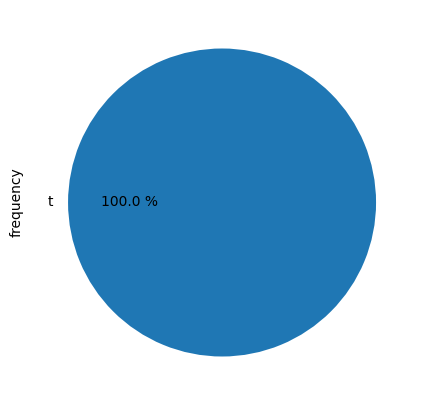

In [34]:
#Realizamos grafico de pastel
Filtro_index['frequency'].plot(kind='pie', figsize=(10,5), shadow=False, autopct='%0.1f %%')

**neighbourhood_cleansed**

In [45]:
#Obtengo un analisis univariado de una variable categorica en especifico
table1 = freq_tbl(data['neighbourhood_cleansed'])
table2 = table1.drop(['percentage', 'cumulative_perc'], axis = 1)
Filtro = table2[table2['frequency'] > 250]
Filtro_index = Filtro.set_index('neighbourhood_cleansed')
Filtro_index

,frequency
neighbourhood_cleansed,
BUENOS AIRES - VENEZIA,1852
DUOMO,1473
SARPI,1012
BRERA,989
LORETO,964
CENTRALE,922
NAVIGLI,907
TICINESE,900
ISOLA,772


Text(0, 0.5, 'Frecuencia')

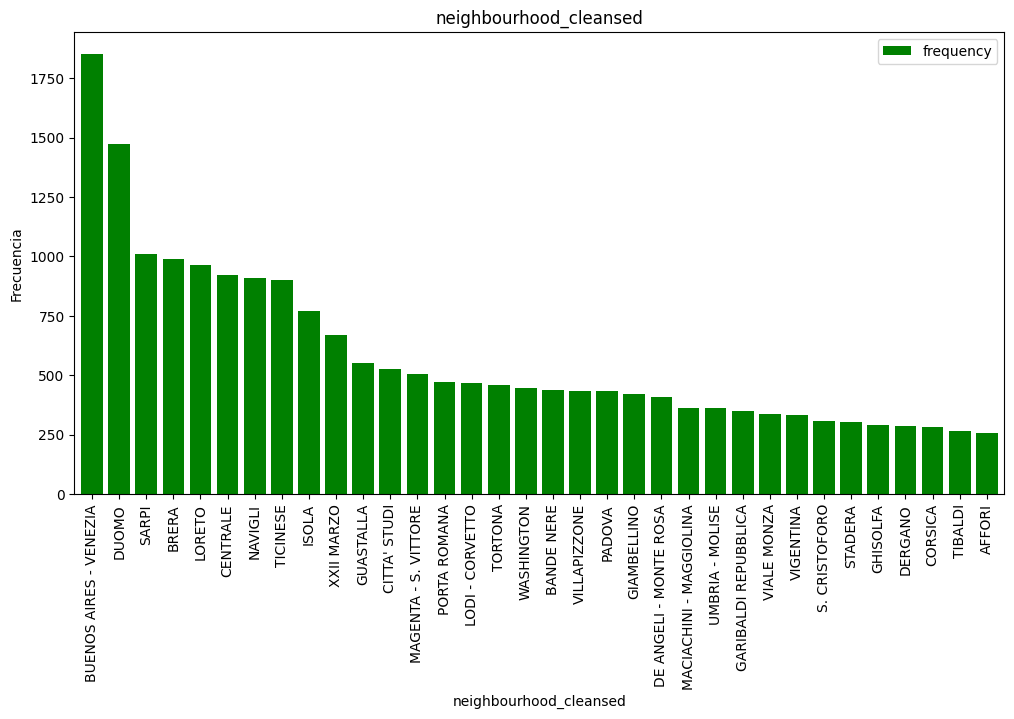

In [48]:
Filtro_index.plot(kind='bar', width=0.8, figsize=(12,6), color='green')
plt.title('neighbourhood_cleansed')
plt.ylabel('Frecuencia')


**last_scraped**

(array([0, 1]), [Text(0, 0, '2024-09-17'), Text(1, 0, '2024-09-18')])

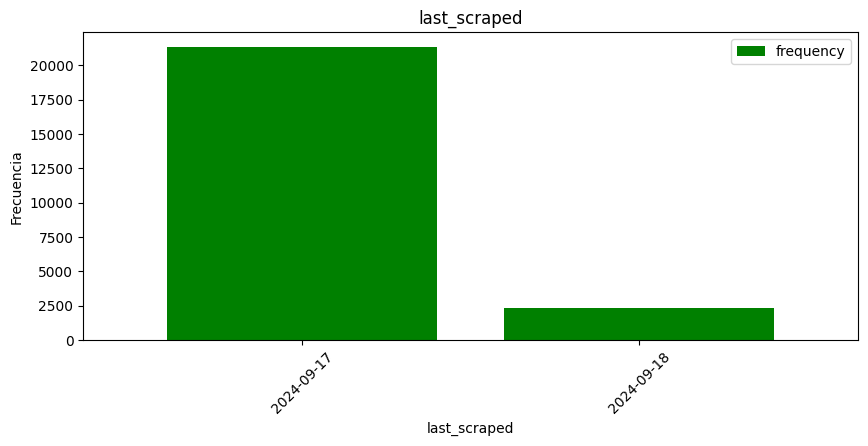

In [49]:
table1 = freq_tbl(data['last_scraped'])
table2 = table1.drop(['percentage', 'cumulative_perc'], axis = 1)

#Ajusto el indice de mi dataframe 
Filtro_index = table2.set_index('last_scraped')
Filtro_index

Filtro_index.plot(kind='bar', width=0.8, figsize=(10,4), color='green')
plt.title('last_scraped')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)

**host_since**

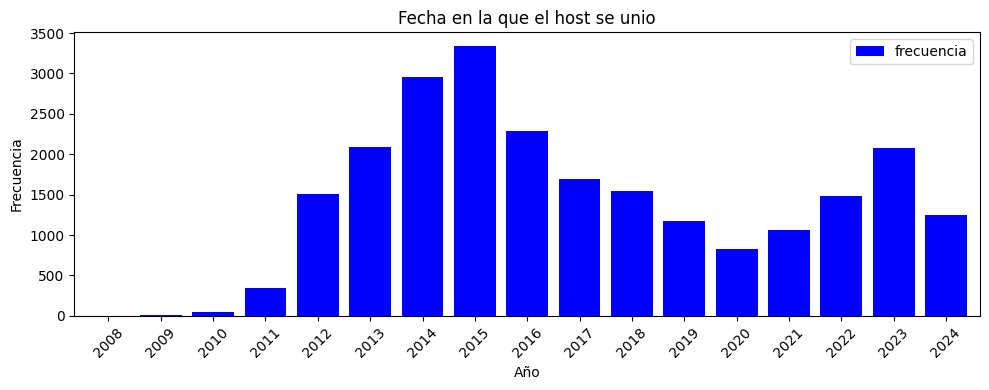

In [50]:
data['host_since'] = pd.to_datetime(data['host_since'])  # Convertimos a datetime

# Agrupar por una unidad de tiempo (por ejemplo, mes o año)
# Agrupamos por año para obtener la frecuencia de hosts registrados por año
table1 = data['host_since'].dt.to_period('Y').value_counts().reset_index()
table1.columns = ['host_since', 'frecuencia']  # Renombrar columnas
table1 = table1.sort_values('host_since')  # Ordenar cronológicamente

# Ajustar el índice al DataFrame
Filtro_index = table1.set_index('host_since')

# Gráfica de barras
Filtro_index.plot(kind='bar', width=0.8, figsize=(10, 4), color='blue')
plt.title('Fecha en la que el host se unio')
plt.ylabel('Frecuencia')
plt.xlabel('Año')
plt.xticks(rotation=45)  # Girar etiquetas para mejor lectura
plt.tight_layout()  # Ajustar diseño
plt.show()

**amenities**

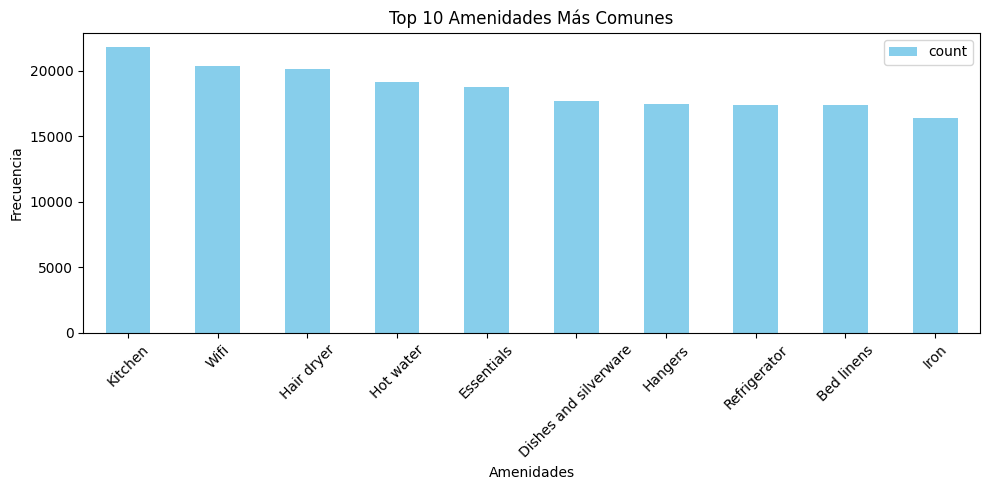

In [51]:
from collections import Counter
import ast
from itertools import chain

# Convertir cadenas de texto a listas reales (si están en formato string como JSON)
data['amenities'] = data['amenities'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Usar itertools.chain para combinar todas las listas de amenities de manera eficiente
all_amenities = chain(*data['amenities'])

# Contar la frecuencia de cada amenidad
amenities_count = Counter(all_amenities)

# Convertir a DataFrame para análisis más cómodo
amenities_df = pd.DataFrame(amenities_count.items(), columns=['amenity', 'count']).sort_values(by='count', ascending=False)

# Seleccionar las 10 amenidades más comunes
top_amenities = amenities_df.head(10)

# Graficar
top_amenities.plot(kind='bar', x='amenity', y='count', color='skyblue', figsize=(10, 5))
plt.title('Top 10 Amenidades Más Comunes')
plt.ylabel('Frecuencia')
plt.xlabel('Amenidades')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**calendar_last_scraped**

In [52]:
table1 = freq_tbl(data['calendar_last_scraped'])
table2 = table1.drop(['percentage', 'cumulative_perc'], axis = 1)
table2

,calendar_last_scraped,frequency
0,2024-09-17,21361
1,2024-09-18,2344


(array([0, 1]), [Text(0, 0, '2024-09-17'), Text(1, 0, '2024-09-18')])

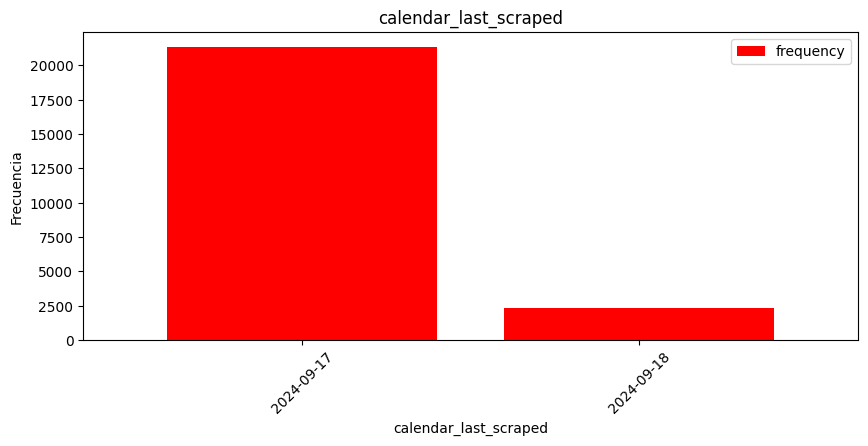

In [53]:
#Ajusto el indice de mi dataframe 
Filtro_index = table2.set_index('calendar_last_scraped')
Filtro_index

Filtro_index.plot(kind='bar', width=0.8, figsize=(10,4), color='red')
plt.title('calendar_last_scraped')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)

**last_review**

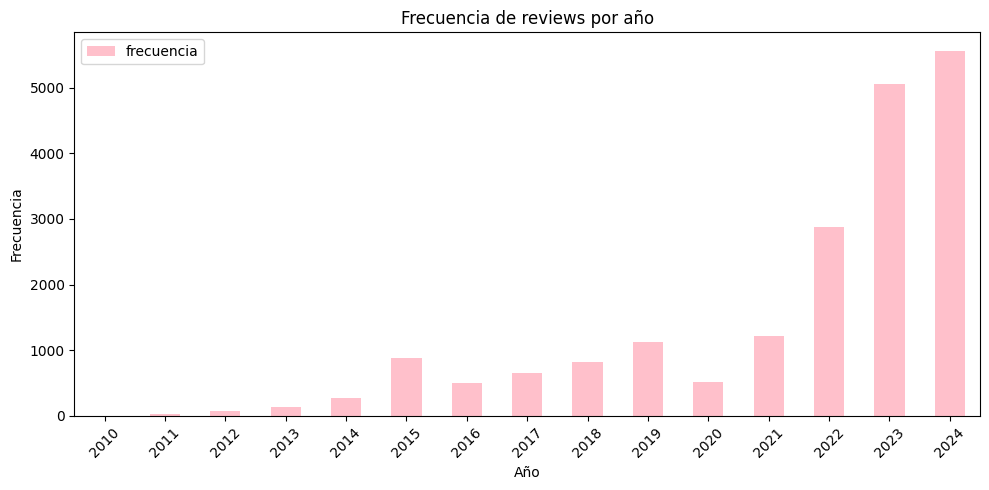

In [54]:
data['last_review'] = pd.to_datetime(data['first_review'], errors='coerce')

# Agrupar por año y contar las frecuencias
table1 = data['last_review'].dt.to_period('Y').value_counts().reset_index()
table1.columns = ['last_review', 'frecuencia']  # Renombrar columnas
table1 = table1.sort_values('last_review')  # Ordenar cronológicamente

# Graficar los datos
table1.plot(x='last_review', y='frecuencia', kind='bar', figsize=(10, 5), color='pink')
plt.title('Frecuencia de reviews por año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**instant_bookable**

([<matplotlib.axis.XTick at 0x289df3c4770>,
 [Text(0, 0, 'Sí (t)'), Text(1, 0, 'No (f)')])

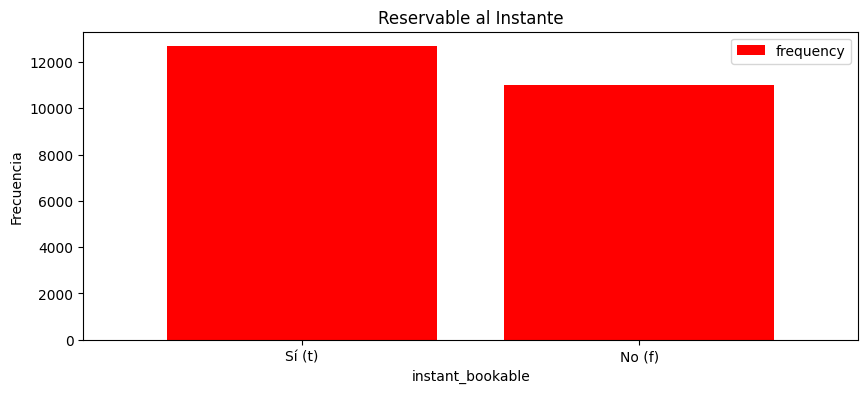

In [55]:
table1 = freq_tbl(data['instant_bookable'])
table2 = table1.drop(['percentage', 'cumulative_perc'], axis = 1)
table2

#Ajusto el indice de mi dataframe 
Filtro_index = table2.set_index('instant_bookable')
Filtro_index

Filtro_index.plot(kind='bar', width=0.8, figsize=(10,4), color='red')
plt.title('Reservable al Instante')
plt.ylabel('Frecuencia')
plt.xticks(ticks=[0, 1], labels=['Sí (t)', 'No (f)'], rotation=0)

**host_name**

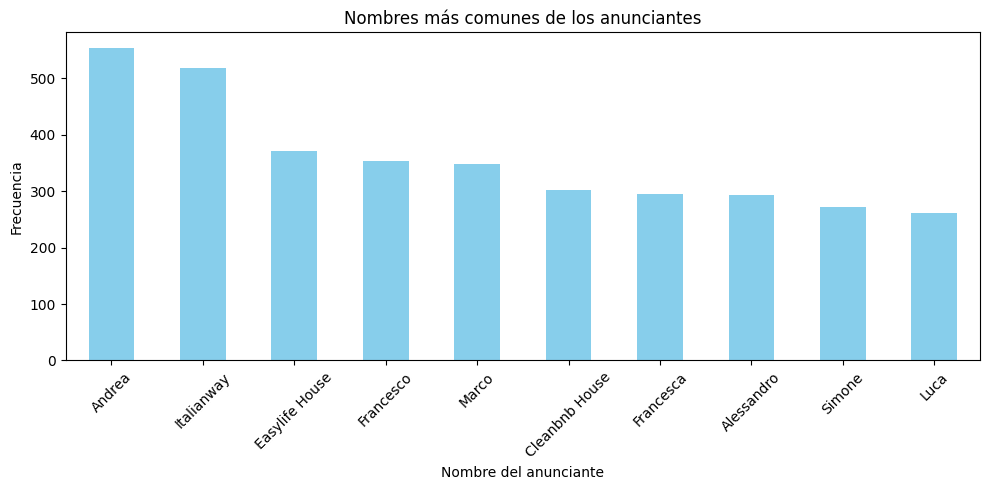

In [56]:
# Contar cuántos nombres únicos existen
unique_names = data['host_name'].nunique()
#print(f"\nNombres únicos: {unique_names}")

# Contar la frecuencia de cada nombre
name_counts = data['host_name'].value_counts()
#print("\nNombres más comunes y sus frecuencias:")
#print(name_counts.head(10))

# Graficar los 10 nombres más comunes
plt.figure(figsize=(10, 5))
name_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Nombres más comunes de los anunciantes')
plt.xlabel('Nombre del anunciante')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()